# Table of Contents

1. [About Dataset](#about-dataset)
2. [Import Libraries](#import-libraries)
3. Read Dataset
  - [Check Columns and Rows](#check-columns-and-rows)
  - [Check the Datasets](#check-the-datasets)
  - [Check Missing Data and Duplicates](#check-missing-data-and-duplicates)
4. Data Exploration
  - [Class](#class)
  - [Amount and Time](#amount-and-time)
  - [Feature Correlation](#feature-correlation)
5. [Feature Scaling](#feature-scaling)
6. [Train Test Split](#train-test-split)
7. Predictive Models (With Random Under-sampling)
  - [Resampling](#resampling-rus)
  - [Random Forest](#random-forest-rus)
  - [Logistic Regression](#logistic-regression-rus)
  - [K-Nearest Neighbors](#k-nearest-neighbors-rus)
  - [Neural Networks Using TensorFlow](#neural-networks-using-tensorflow-rus)
  - [Performance Comparison](#performance-comparison-rus)
8. Predictive Models (With SMOTE - Synthetic Minority Over-sampling Technique)
  - [Resampling](#resampling-smote)
  - [Random Forest](#random-forest-smote)
  - [Logistic Regression](#logistic-regression-smote)
  - [K-Nearest Neighbors](#k-nearest-neighbors-smote)
  - [Neural Networks Using TensorFlow](#neural-networks-using-tensorflow-smote)
  - [Performance Comparison](#performance-comparison-smote)
9. [Summary](#summary)


# About Dataset

**Source:**  Machine Learning Group - ULB, Andrea. (2017). Credit Card Fraud Detection, Version 3. Available at: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud.

**Context:** Credit card companies must detect fraudulent transactions to prevent customers from being wrongly charged.

**Content:**  The dataset includes credit card transactions by European cardholders in September 2013, spanning two days with 492 frauds out of 284,807 transactions, making it highly unbalanced (frauds are 0.173% of all transactions).

All input variables are numerical and derived from a PCA transformation, except 'Time' and 'Amount'. Due to confidentiality, original features and additional background information are not provided. Features V1 to V28 are the principal components from PCA. 'Time' records the seconds between each transaction and the first transaction. 'Amount' is the transaction amount, useful for cost-sensitive learning. The 'Class' feature is the response variable, where 1 indicates fraud and 0 otherwise.



# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
import xgboost as xgb
%matplotlib inline

from sklearn.preprocessing import RobustScaler 
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


from sklearn.metrics import ConfusionMatrixDisplay, recall_score, precision_score, f1_score, accuracy_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# 3. Read Dataset

In [2]:
data = pd.read_csv("creditcard.csv")

## 3.1 Check Columns and Rows

In [3]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
data.shape

(284807, 31)

In [5]:
print("Number of columns: {}".format(data.shape[1]))
print("Number of rows: {}".format(data.shape[0]))

Number of columns: 31
Number of rows: 284807


## 3.2 Check the Dataset

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# Allows us to see all the columns
pd.options.display.max_columns = None

In [8]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
# Returns the last 5 rows
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [10]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## 3.3 Check Missing Data and Duplicates

In [12]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
data.duplicated().any()

True

In [14]:
data = data.drop_duplicates()

In [15]:
data.shape

(283726, 31)

# 4. Data Exploration

## 4.1 Class

The dataset is highly imbalanced.

In [16]:
print('Genuine:', round(data['Class'].value_counts()[0]/len(data)*100, 2), '% of the transactions')
print('Fraudulent:', round(data['Class'].value_counts()[1]/len(data)*100, 2), '% of the transactions')

Genuine: 99.83 % of the transactions
Fraudulent: 0.17 % of the transactions


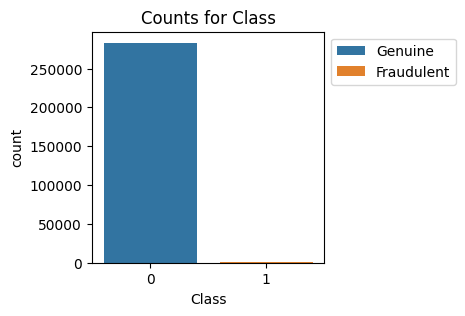

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(3,3))
sns.countplot(x='Class', data=data, hue='Class')
plt.title('Counts for Class')
plt.legend(labels = ['Genuine','Fraudulent'], bbox_to_anchor=(1, 1))

## 4.2 Amount and Time

Text(0.5, 1.0, 'Distribution of Time')

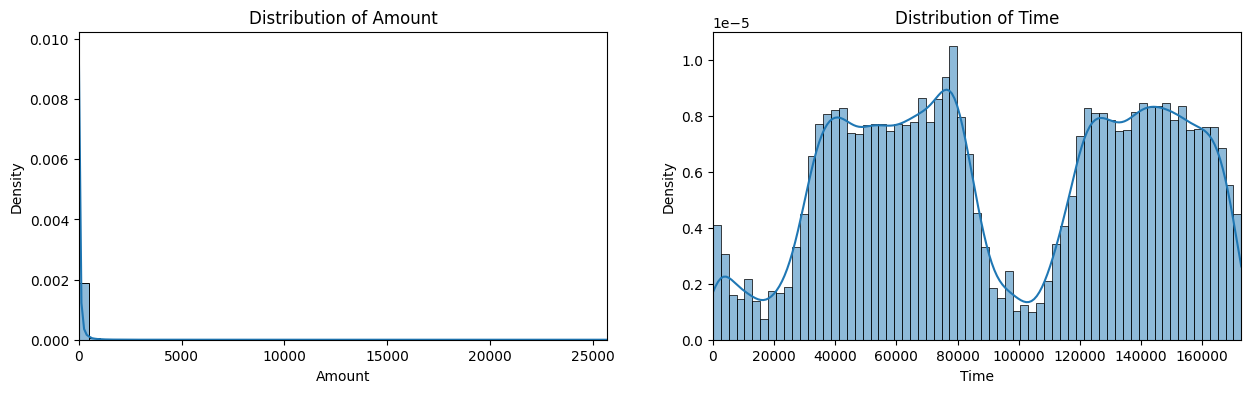

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

ax1 = sns.histplot(ax=ax1, x='Amount', data=data, stat='density', bins=50, kde=True)
ax1.set_xlim(min(data['Amount']), max(data['Amount']))
ax1.set_title('Distribution of Amount', fontsize=12)

ax2 = sns.histplot(ax=ax2, x='Time', data=data, stat='density', kde=True)
ax2.set_xlim(min(data['Time']), max(data['Time'])) 
ax2.set_title('Distribution of Time', fontsize=12)

## 4.3 Feature Correlation

<Axes: >

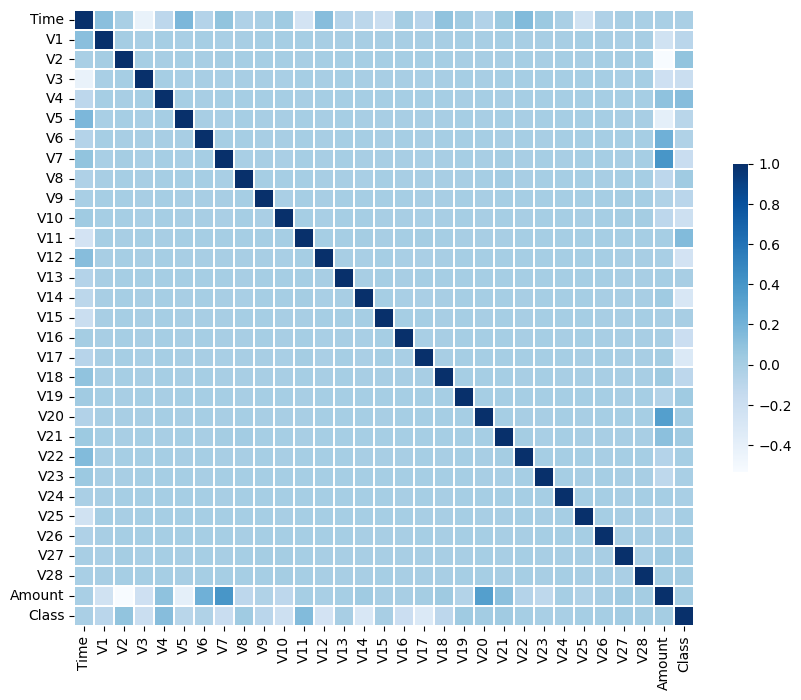

In [19]:

fig = plt.figure(figsize=(10,8))
corr = data.corr(numeric_only=True)
sns.heatmap(data=corr, cmap='Blues', linewidth=0.2, cbar_kws={"shrink": 0.5})


####
- Time is inversely related to V3.
- Amount is positively related to V7 and V20, but negatively related to V2 and V5.
- Class shows a slight negative relationship with V17 and V14.







# 5. Feature Scaling

Feature scaling was used because it is more robust to outliers.

In [20]:
rs = RobustScaler()

In [21]:
data['scaled_amount'] = rs.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rs.fit_transform(data['Time'].values.reshape(-1,1))

In [22]:
data.drop(['Amount', 'Time'], axis=1, inplace=True)

In [23]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.774718,-0.995290
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.268530,-0.995290
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.959811,-0.995279
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.411487,-0.995279
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.667362,-0.995267


# 6. Train Test Split

In [24]:
X = data.drop('Class', axis=1)
y = data['Class']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [26]:
print('Number of Transactions in Training Set: {:,}'.format(len(X_train)))
print('Number of Transactions in Test Set: {:,}'.format(len(X_test)))
print('Total Number of Transactions: {:,}'.format(len(X_train) + len(X_test)))

Number of Transactions in Training Set: 198,608
Number of Transactions in Test Set: 85,118
Total Number of Transactions: 283,726


# 7. Predictive Models (With Random Under-sampling)


## 7.1 Resampling


In [27]:
# Define under-sampling strategy and resample the dataset
rus = RandomUnderSampler(random_state=42)

X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

print('No. of Genuine Transactions:', y_train_under.value_counts()[0])
print('No. of Fraudulent Transactions:', y_train_under.value_counts()[1])
print('Total No. of Transactions:', len(y_train_under))

No. of Genuine Transactions: 331
No. of Fraudulent Transactions: 331
Total No. of Transactions: 662


## 7.2 Random Forest


In [28]:
# Create an instance of the model
rf = RandomForestClassifier(random_state=42)

In [29]:
# Evaluate the recall score by stratified k-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=False)
score = cross_val_score(rf, X_train_under, y_train_under, scoring='recall', cv=kf)

print('Cross Validation Recall Scores: {}'.format(score))
print('Average Cross Validation Recall Score: {}'.format(score.mean()))

Cross Validation Recall Scores: [0.92424242 0.88059701 0.87878788 0.95454545 0.84848485]
Average Cross Validation Recall Score: 0.8973315241971959


In [30]:
# Tune hyper-parameters using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [6, 10, 12, 14, 16, 18]
}

rf_under_grid = GridSearchCV(rf, param_grid, scoring='recall', cv=kf).fit(X_train_under, y_train_under)

print('Best Parameters: {}'.format(rf_under_grid.best_params_))
print('Best Recall Score: {}'.format(rf_under_grid.best_score_))

Best Parameters: {'max_depth': 14, 'n_estimators': 300}
Best Recall Score: 0.9063319764812302


In [31]:
# Make predictions on the test set with the best found parameters
rf_under_pred = rf_under_grid.predict(X_test)

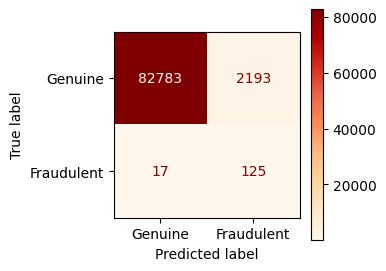

In [32]:
# Visualise the confusion matrix
fig, ax = plt.subplots(1, 1, figsize=(3,3))
display_labels = ['Genuine','Fraudulent']
ConfusionMatrixDisplay.from_predictions(y_test, rf_under_pred, display_labels=display_labels, ax=ax, cmap='OrRd')

In [33]:
# Compute the main metrics
rf_under_recall = recall_score(y_test, rf_under_pred)
rf_under_precision = precision_score(y_test, rf_under_pred)
rf_under_f1 = f1_score(y_test, rf_under_pred)
rf_under_accuracy = accuracy_score(y_test, rf_under_pred)

rf_under_scores = pd.DataFrame(data=[(rf_under_recall, rf_under_precision, rf_under_f1, rf_under_accuracy)], 
                               columns=['Recall','Precision','F1 Score', 'Accuracy'],
                               index=['Random Forest'])

rf_under_scores.head()

,Recall,Precision,F1 Score,Accuracy
Random Forest,0.880282,0.053926,0.101626,0.974036


## 7.3 Logistic Regression

In [34]:
lr = LogisticRegression(max_iter=400)

In [35]:
kf = StratifiedKFold(n_splits=5, shuffle=False)
score = cross_val_score(lr, X_train_under, y_train_under, scoring='recall', cv=kf)

print('Cross Validation Recall Scores: {}'.format(score))
print('Average Cross Validation Recall Score: {}'.format(score.mean()))

Cross Validation Recall Scores: [0.93939394 0.91044776 0.90909091 0.95454545 0.87878788]
Average Cross Validation Recall Score: 0.9184531886024423


In [36]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

lr_under_grid = GridSearchCV(lr, param_grid, scoring='recall', cv=kf).fit(X_train_under, y_train_under)

print('Best Parameters: {}'.format(lr_under_grid.best_params_))
print('Best Recall Score: {}'.format(lr_under_grid.best_score_))

Best Parameters: {'C': 10}
Best Recall Score: 0.9275440976933513


In [37]:
lr_under_pred = lr_under_grid.predict(X_test)

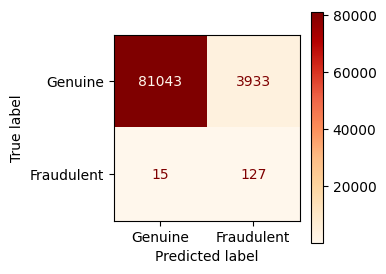

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(3,3))
display_labels = ['Genuine','Fraudulent']
ConfusionMatrixDisplay.from_predictions(y_test, lr_under_pred, display_labels=display_labels, ax=ax, cmap='OrRd')

In [39]:
lr_under_recall = recall_score(y_test, lr_under_pred)
lr_under_precision = precision_score(y_test, lr_under_pred)
lr_under_f1 = f1_score(y_test, lr_under_pred)
lr_under_accuracy = accuracy_score(y_test, lr_under_pred)

lr_under_scores = pd.DataFrame(data=[(lr_under_recall, lr_under_precision, lr_under_f1, lr_under_accuracy)], 
                               columns=['Recall','Precision','F1 Score', 'Accuracy'],
                               index=['Logistic Regression'])

## 7.4 K-Nearest Neighbors

In [40]:
knn = KNeighborsClassifier()

In [41]:
kf = StratifiedKFold(n_splits=5, shuffle=False)
score = cross_val_score(knn, X_train_under, y_train_under, scoring='recall', cv=kf)

print('Cross Validation Recall Scores: {}'.format(score))
print('Average Cross Validation Recall Score: {}'.format(score.mean()))

Cross Validation Recall Scores: [0.92424242 0.89552239 0.84848485 0.92424242 0.81818182]
Average Cross Validation Recall Score: 0.8821347806422434


In [42]:
param_grid = {
    'n_neighbors': [1, 10, 20, 30, 40]
}

knn_under_grid = GridSearchCV(knn, param_grid, scoring='recall',cv=kf).fit(X_train_under, y_train_under)

print('Best Parameters: {}'.format(knn_under_grid.best_params_))
print('Best Recall Score: {}'.format(knn_under_grid.best_score_))

Best Parameters: {'n_neighbors': 1}
Best Recall Score: 0.9214834916327452


In [43]:
knn_under_pred = knn_under_grid.predict(X_test)


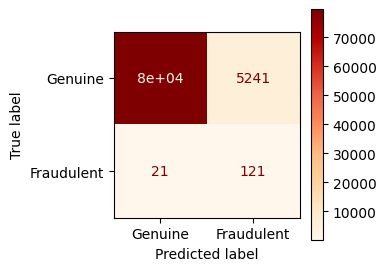

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(3,3))
display_labels = ['Genuine','Fraudulent']
ConfusionMatrixDisplay.from_predictions(y_test, knn_under_pred, display_labels=display_labels, ax=ax, cmap='OrRd')

In [45]:
knn_under_recall = recall_score(y_test, knn_under_pred)
knn_under_precision = precision_score(y_test, knn_under_pred)
knn_under_f1 = f1_score(y_test, knn_under_pred)
knn_under_accuracy = accuracy_score(y_test, knn_under_pred)

knn_under_scores = pd.DataFrame(data=[(knn_under_recall, knn_under_precision, knn_under_f1, knn_under_accuracy)], 
                                columns=['Recall','Precision','F1 Score', 'Accuracy'],
                                index=['KNN'])

knn_under_scores.head()

,Recall,Precision,F1 Score,Accuracy
KNN,0.852113,0.022566,0.043968,0.93818


## 7.6 Neural Networks Using TensorFlow


In [46]:
# Set up the layers and compile the model
tf_model_under = Sequential()

tf_model_under.add(Dense(30, activation='relu'))
tf_model_under.add(Dropout(0.1))

tf_model_under.add(Dense(15, activation='relu'))
tf_model_under.add(Dropout(0.1))

tf_model_under.add(Dense(1, activation='sigmoid'))

tf_model_under.compile(loss='binary_crossentropy', optimizer='adam')

In [47]:
# Fit the neural network model to the training set
tf_model_under.fit(x=X_train_under, y=y_train_under, epochs=30, validation_split=0.2)

Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.0525 - val_loss: 7.5936
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5620 - val_loss: 2.4698
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9556 - val_loss: 0.4571
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5772 - val_loss: 0.2851
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4741 - val_loss: 0.2539
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4093 - val_loss: 0.2642
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3641 - val_loss: 0.2764
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3194 - val_loss: 0.2801
Epoch 9/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3177 - val_loss: 0.2852
Epoch 10/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2979 - val_loss: 0.2881
Epoch 11/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2725 - val_loss: 0.2927
Epoch 12/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2446 - val_l

Text(0, 0.5, 'Loss')

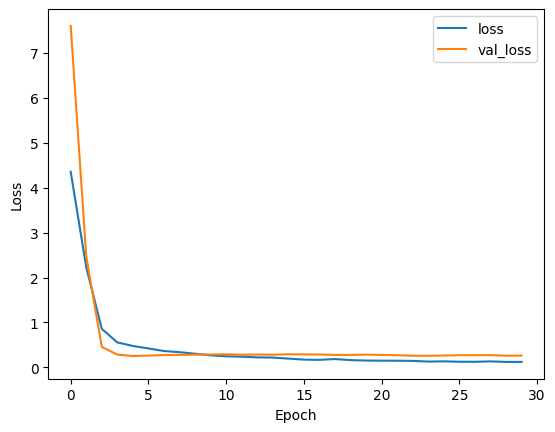

In [48]:
# Review training and validation loss
losses = pd.DataFrame(tf_model_under.history.history) 
losses.plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [49]:
tf_under_pred = (tf_model_under.predict(X_test) > 0.5).astype("int32")

2660/2660 ━━━━━━━━━━━━━━━━━━━━ 2s 805us/step


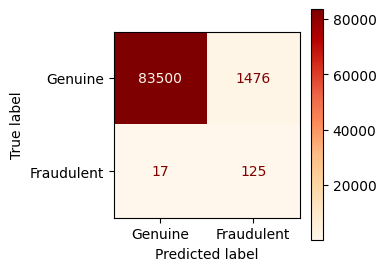

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(3,3))
display_labels = ['Genuine','Fraudulent']
ConfusionMatrixDisplay.from_predictions(y_test, tf_under_pred, display_labels=display_labels, ax=ax, cmap='OrRd')

In [51]:
tf_under_recall = recall_score(y_test, tf_under_pred)
tf_under_precision = precision_score(y_test, tf_under_pred)
tf_under_f1 = f1_score(y_test, tf_under_pred)
tf_under_accuracy = accuracy_score(y_test, tf_under_pred)

tf_under_scores = pd.DataFrame(data=[(tf_under_recall, tf_under_precision, tf_under_f1, tf_under_accuracy)], 
                               columns=['Recall', 'Precision','F1 Score', 'Accuracy'],
                               index=['Neural Networks Using TensorFlow'])

tf_under_scores.head()

,Recall,Precision,F1 Score,Accuracy
Neural Networks Using TensorFlow,0.880282,0.078076,0.143431,0.98246


## 7.7 Performance Comparison

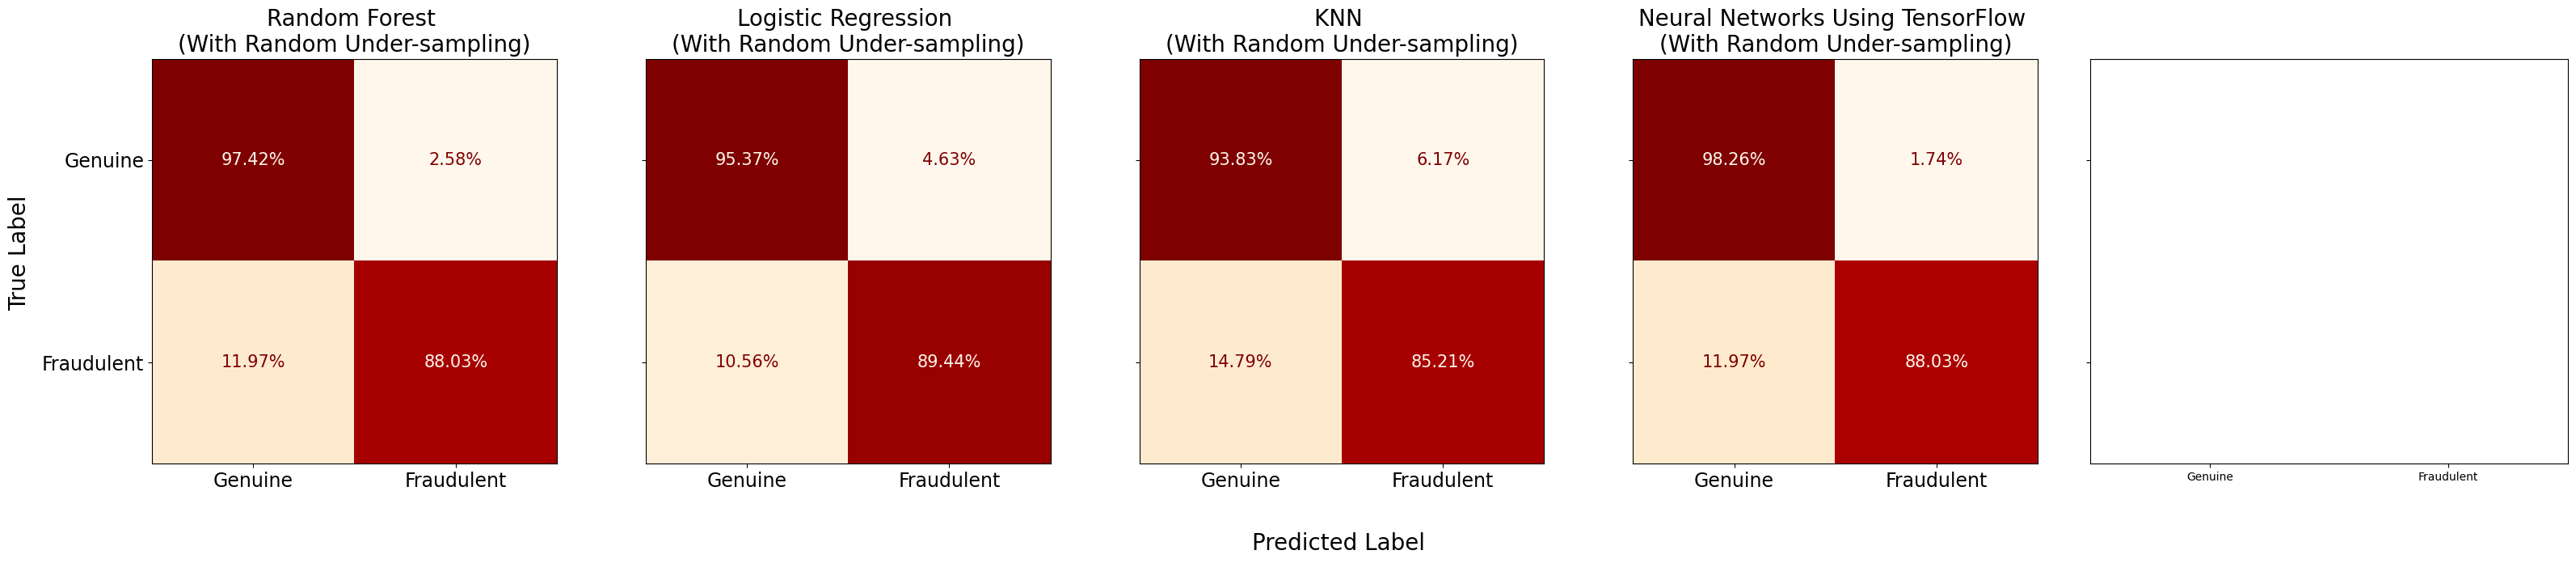

In [52]:
fig, axes = plt.subplots(1, 5, figsize=(32, 6), sharex=True, sharey=True)

under_predictions_list = [rf_under_pred, lr_under_pred, knn_under_pred, tf_under_pred]
models = ['Random Forest', 'Logistic Regression', 'KNN', 'Neural Networks Using TensorFlow']
techniques = ['With Random Under-sampling'] * 5

axes = axes.flatten()

for i, predictions in enumerate(under_predictions_list):
    ax = axes[i]  
    cm_display = ConfusionMatrixDisplay.from_predictions(y_test, predictions, ax=ax, display_labels=display_labels, cmap='OrRd', colorbar=False, normalize='true', values_format='.2%', text_kw={"fontsize":15})
    
    title = f'{models[i]} \n({techniques[i]})'
    cm_display.ax_.set_title(f'{title}', fontsize=20)

    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

    axes[i].set_xticklabels(display_labels, fontsize=17)
    axes[i].set_yticklabels(display_labels, fontsize=17)
    
fig.text(0.52, -0.1, 'Predicted Label', ha='center', va='center', fontsize=20)
fig.text(0.01, 0.5, 'True Label', ha='center', va='center', rotation='vertical', fontsize=20)

plt.tight_layout() 
plt.show() 

In [53]:
prediction_under = pd.concat([rf_under_scores, lr_under_scores, knn_under_scores, tf_under_scores], ignore_index=False)

iterables = [['With Random Under-sampling'], list(prediction_under.index)]
index = pd.MultiIndex.from_product(iterables, names=['Technique', 'Model'])
prediction_under = pd.DataFrame(prediction_under.to_numpy(), index=index, columns=list(prediction_under.columns.values))

prediction_under.head()

Recall  \
Technique                  Model                                        
With Random Under-sampling Random Forest                     0.880282   
                           Logistic Regression               0.894366   
                           KNN                               0.852113   
                           Neural Networks Using TensorFlow  0.880282   

                                                             Precision  \
Technique                  Model                                         
With Random Under-sampling Random Forest                      0.053926   
                           Logistic Regression                0.031281   
                           KNN                                0.022566   
                           Neural Networks Using TensorFlow   0.078076   

                                                             F1 Score  \
Technique                  Model                                        
With Random Under-sampling Random Forest                     0.101626   
                           Logistic Regression               0.060447   
                           KNN                               0.043968   
                           Neural Networks Using TensorFlow  0.143431   

                                                             Accuracy  
Technique                  Model                                       
With Random Under-sampling Random Forest                     0.974036  
                           Logistic Regression               0.953617  
                           KNN                               0.938180  
                           Neural Networks Using TensorFlow  0.982460

# 8. Predictive Models (With SMOTE - Synthetic Minority Over-sampling Technique)

## 8.1 Random Forest


In [54]:
rf_smote_pipeline = make_pipeline(SMOTE(sampling_strategy = 0.5, random_state=42), RandomForestClassifier(random_state=42))

In [55]:
kf = StratifiedKFold(n_splits=5, shuffle=False)
score = cross_val_score(rf_smote_pipeline, X_train, y_train, scoring='recall', cv=kf)

print('Cross Validation Recall Scores: {}'.format(score))
print('Average Cross Validation Recall Score: {}'.format(score.mean()))

Cross Validation Recall Scores: [0.87878788 0.81818182 0.80597015 0.87878788 0.72727273]
Average Cross Validation Recall Score: 0.8218000904568068


In [56]:
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [10, 12, 14]
}

rf_smote_grid = GridSearchCV(rf_smote_pipeline, param_grid, scoring='recall', cv=kf, n_jobs=-1).fit(X_train, y_train)

print('Best Parameters: {}'.format(rf_smote_grid.best_params_))
print('Best Recall Score: {}'.format(rf_smote_grid.best_score_))

Best Parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 100}
Best Recall Score: 0.8429669832654907


In [57]:
rf_smote_pred = rf_smote_grid.predict(X_test)


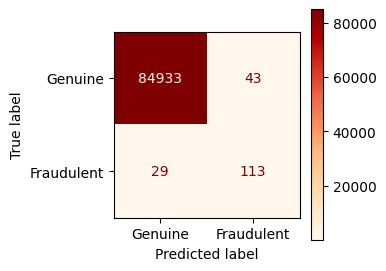

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(3,3))
display_labels = ['Genuine','Fraudulent']
ConfusionMatrixDisplay.from_predictions(y_test, rf_smote_pred, display_labels=display_labels, ax=ax, cmap='OrRd')

In [59]:
rf_smote_recall = recall_score(y_test, rf_smote_pred)
rf_smote_precision = precision_score(y_test, rf_smote_pred)
rf_smote_f1 = f1_score(y_test, rf_smote_pred)
rf_smote_accuracy = accuracy_score(y_test, rf_smote_pred)

rf_smote_scores = pd.DataFrame(data=[(rf_smote_recall, rf_smote_precision, rf_smote_f1, rf_smote_accuracy)], 
                               columns=['Recall', 'Precision', 'F1 Score', 'Accuracy'],
                               index=['Random Forest'])

rf_smote_scores.head()

,Recall,Precision,F1 Score,Accuracy
Random Forest,0.795775,0.724359,0.758389,0.999154


## 8.2 Logistic Regression

In [60]:
# Create a pipeline with SMOTE and the model
lr_smote_pipeline = make_pipeline(SMOTE(sampling_strategy=0.5, random_state=42), LogisticRegression(max_iter=500))

In [61]:

# Evaluate the recall score by stratified k-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=False)
score = cross_val_score(lr_smote_pipeline, X_train, y_train, scoring='recall', cv=kf)

print('Cross Validation Recall Scores: {}'.format(score))
print('Average Cross Validation Recall Score: {}'.format(score.mean()))

Cross Validation Recall Scores: [0.92424242 0.87878788 0.86567164 0.95454545 0.83333333]
Average Cross Validation Recall Score: 0.8913161465400272


In [62]:
# Tune hyper-parameters using GridSearchCV
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

lr_smote_grid = GridSearchCV(lr_smote_pipeline, param_grid, scoring='recall', cv=kf, n_jobs=-1).fit(X_train, y_train)

print('Best Parameters: {}'.format(lr_smote_grid.best_params_))
print('Best Recall Score: {}'.format(lr_smote_grid.best_score_))

Best Parameters: {'logisticregression__C': 0.1}
Best Recall Score: 0.8913161465400272


In [63]:
# Make predictions on the test set with the best found parameters
lr_smote_pred = lr_smote_grid.predict(X_test)

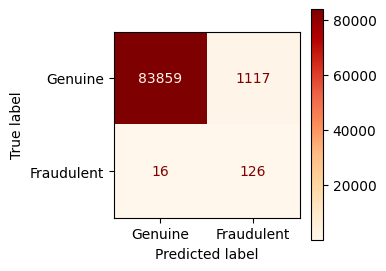

In [64]:
# Visualise the confusion matrix
fig, ax = plt.subplots(1, 1, figsize=(3,3))
display_labels = ['Genuine','Fraudulent']
ConfusionMatrixDisplay.from_predictions(y_test, lr_smote_pred, display_labels=display_labels, ax=ax, cmap='OrRd')

In [65]:
# Compute the main metrics
lr_smote_recall = recall_score(y_test, lr_smote_pred)
lr_smote_precision = precision_score(y_test, lr_smote_pred)
lr_smote_f1 = f1_score(y_test, lr_smote_pred)
lr_smote_accuracy = accuracy_score(y_test, lr_smote_pred)

lr_smote_scores = pd.DataFrame(data=[(lr_smote_recall, lr_smote_precision, lr_smote_f1, lr_smote_accuracy)], 
                               columns=['Recall', 'Precision', 'F1 Score', 'Accuracy'],
                               index=['Logistic Regression'])

lr_smote_scores.head()

,Recall,Precision,F1 Score,Accuracy
Logistic Regression,0.887324,0.101368,0.181949,0.986689


## 8.3 K-Nearest Neighbors

In [66]:
# Create a pipeline with SMOTE and the model
knn_smote_pipeline = make_pipeline(SMOTE(sampling_strategy=0.5, random_state=42), KNeighborsClassifier())

In [67]:
score = cross_val_score(knn_smote_pipeline, X_train, y_train, scoring='recall', cv=kf)

print('Cross Validation Recall Scores: {}'.format(score))
print('Average Cross Validation Recall Score: {}'.format(score.mean()))

Cross Validation Recall Scores: [0.86363636 0.87878788 0.82089552 0.90909091 0.78787879]
Average Cross Validation Recall Score: 0.8520578923564


In [68]:
param_grid = {
    'kneighborsclassifier__n_neighbors': [1, 10, 20, 30, 40]
}

knn_smote_grid = GridSearchCV(knn_smote_pipeline, param_grid, scoring='recall', cv=kf, n_jobs=-1).fit(X_train, y_train)

print('Best Parameters: {}'.format(knn_smote_grid.best_params_))
print('Best Recall Score: {}'.format(knn_smote_grid.best_score_))

Best Parameters: {'kneighborsclassifier__n_neighbors': 40}
Best Recall Score: 0.8821347806422434


In [69]:
knn_smote_pred = knn_smote_grid.predict(X_test)

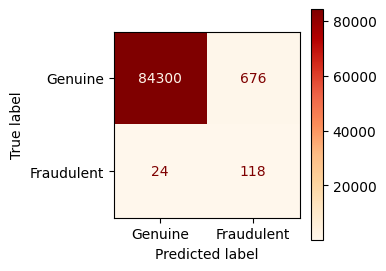

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(3,3))
display_labels = ['Genuine','Fraudulent']
ConfusionMatrixDisplay.from_predictions(y_test, knn_smote_pred, display_labels=display_labels, ax=ax, cmap='OrRd')

In [71]:
knn_smote_recall = recall_score(y_test, knn_smote_pred)
knn_smote_precision = precision_score(y_test, knn_smote_pred)
knn_smote_f1 = f1_score(y_test, knn_smote_pred)
knn_smote_accuracy = accuracy_score(y_test, knn_smote_pred)

knn_smote_scores = pd.DataFrame(data=[(knn_smote_recall, knn_smote_precision, knn_smote_f1, knn_smote_accuracy)], 
                                columns=['Recall', 'Precision','F1 Score', 'Accuracy'],
                                index=['KNN'])

knn_smote_scores.head()

,Recall,Precision,F1 Score,Accuracy
KNN,0.830986,0.148615,0.252137,0.991776


## 8.5 Neural Networks Using TensorFlow


In [72]:
# Define over-sampling strategy and resample the dataset
sm = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print('No. of Genuine Transactions: {:,}'.format(y_train_smote.value_counts()[0]))
print('No. of Fraudulent Transactions: {:,}'.format(y_train_smote.value_counts()[1]))
print('Total No. of Transactions: {:,}'.format(len(y_train_smote)))

No. of Genuine Transactions: 198,277
No. of Fraudulent Transactions: 99,138
Total No. of Transactions: 297,415


In [73]:

# Set up the layers and compile the model
tf_model_smote = Sequential()

tf_model_smote.add(Dense(30, activation='relu'))
tf_model_smote.add(Dropout(0.2))

tf_model_smote.add(Dense(25, activation='relu'))
tf_model_smote.add(Dropout(0.2))

tf_model_smote.add(Dense(20, activation='relu'))
tf_model_smote.add(Dropout(0.2))

tf_model_smote.add(Dense(15, activation='relu'))
tf_model_smote.add(Dropout(0.2))

tf_model_smote.add(Dense(10, activation='relu'))
tf_model_smote.add(Dropout(0.2))

tf_model_smote.add(Dense(1, activation='sigmoid'))

tf_model_smote.compile(loss='binary_crossentropy', optimizer='adam')

In [74]:
tf_model_smote.fit(x=X_train_smote, y=y_train_smote, epochs=40, batch_size=250, validation_split=0.2)

Epoch 1/40
952/952 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.2468 - val_loss: 0.1404
Epoch 2/40
952/952 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0447 - val_loss: 0.0401
Epoch 3/40
952/952 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0245 - val_loss: 0.0146
Epoch 4/40
952/952 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0164 - val_loss: 0.0137
Epoch 5/40
952/952 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0126 - val_loss: 0.0058
Epoch 6/40
952/952 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0115 - val_loss: 0.0053
Epoch 7/40
952/952 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0098 - val_loss: 0.0048
Epoch 8/40
952/952 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0093 - val_loss: 0.0040
Epoch 9/40
952/952 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0094 - val_loss: 0.0044
Epoch 10/40
952/952 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0082 - val_loss: 0.0034
Epoch 11/40
952/952 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0087 - val_loss: 0.0041
Epoch 12/40
952/952 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/ste

Text(0, 0.5, 'Loss')

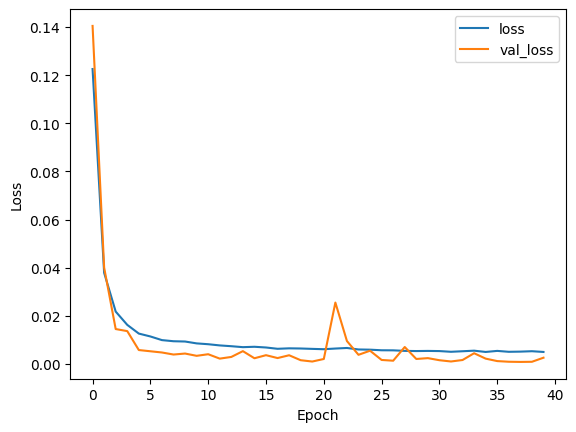

In [75]:
losses = pd.DataFrame(tf_model_smote.history.history) 
losses.plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [76]:
tf_smote_pred = (tf_model_smote.predict(X_test) > 0.5).astype("int32")

2660/2660 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


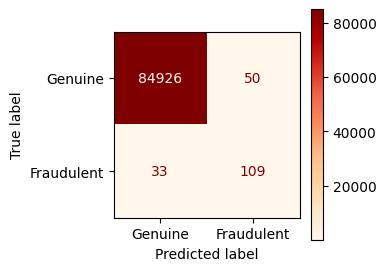

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(3,3))
display_labels = ['Genuine','Fraudulent']
ConfusionMatrixDisplay.from_predictions(y_test, tf_smote_pred, display_labels=display_labels, ax=ax, cmap='OrRd')

In [78]:
tf_smote_recall = recall_score(y_test, tf_smote_pred)
tf_smote_precision = precision_score(y_test, tf_smote_pred)
tf_smote_f1 = f1_score(y_test, tf_smote_pred)
tf_smote_accuracy = accuracy_score(y_test, tf_smote_pred)

tf_smote_scores = pd.DataFrame(data=[(tf_smote_recall, tf_smote_precision, tf_smote_f1, tf_smote_accuracy)], 
                               columns=['Recall', 'Precision','F1 Score', 'Accuracy'],
                               index=['Neural Networks Using TensorFlow'])


## 8.6 Performance Comparison

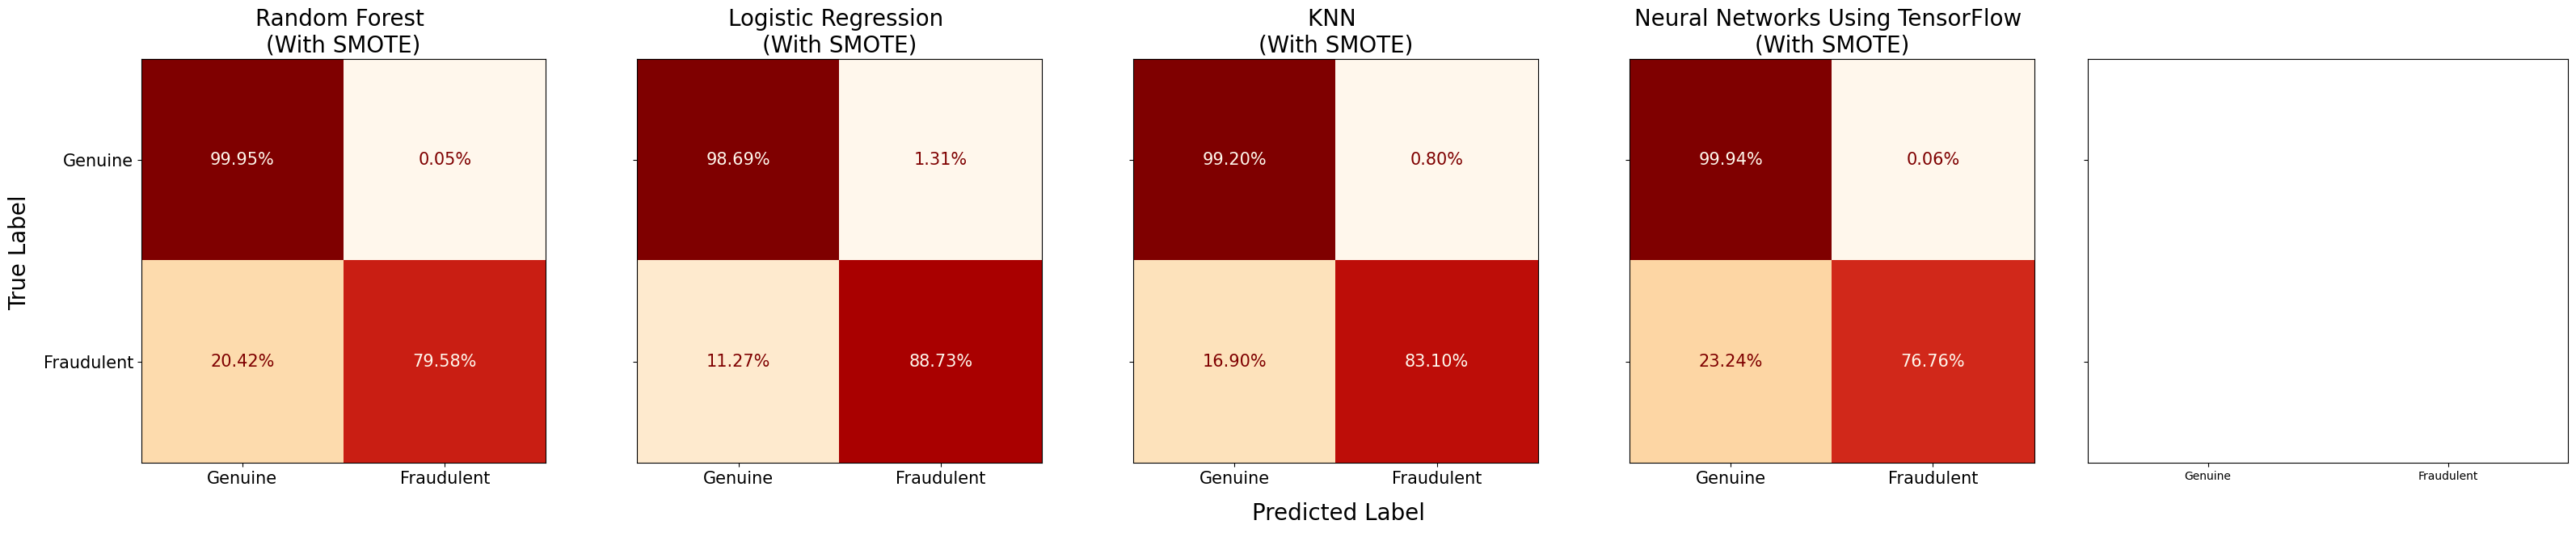

In [79]:
fig, axes = plt.subplots(1, 5, figsize=(32, 6), sharex=True, sharey=True)

smote_predictions_list = [rf_smote_pred, lr_smote_pred, knn_smote_pred, tf_smote_pred]
models = ['Random Forest', 'Logistic Regression', 'KNN', 'Neural Networks Using TensorFlow']
techniques = ['With SMOTE'] * 5

axes = axes.flatten()

for i, predictions in enumerate(smote_predictions_list):
    ax = axes[i]  
    cm_display = ConfusionMatrixDisplay.from_predictions(y_test, predictions, ax=ax, display_labels=display_labels, cmap='OrRd', colorbar=False, normalize='true', values_format='.2%', text_kw={"fontsize":15})
    
    title = f'{models[i]} \n({techniques[i]})'
    cm_display.ax_.set_title(f'{title}', fontsize=20)

    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

    axes[i].set_xticklabels(display_labels, fontsize=15)
    axes[i].set_yticklabels(display_labels, fontsize=15)
    
fig.text(0.52, -0.04, 'Predicted Label', ha='center', va='center', fontsize=20)
fig.text(0.01, 0.5, 'True Label', ha='center', va='center', rotation='vertical', fontsize=20)

plt.tight_layout() 
plt.show() 

In [80]:
prediction_smote = pd.concat([rf_smote_scores, lr_smote_scores, knn_smote_scores, tf_smote_scores], ignore_index=False)

iterables = [['With SMOTE'], list(prediction_smote.index)]
index = pd.MultiIndex.from_product(iterables, names=['Technique', 'Model'])
prediction_smote = pd.DataFrame(prediction_smote.to_numpy(), index=index, columns=list(prediction_smote.columns.values))

prediction_smote.head()

Recall  Precision  F1 Score  \
Technique  Model                                                             
With SMOTE Random Forest                     0.795775   0.724359  0.758389   
           Logistic Regression               0.887324   0.101368  0.181949   
           KNN                               0.830986   0.148615  0.252137   
           Neural Networks Using TensorFlow  0.767606   0.685535  0.724252   

                                             Accuracy  
Technique  Model                                       
With SMOTE Random Forest                     0.999154  
           Logistic Regression               0.986689  
           KNN                               0.991776  
           Neural Networks Using TensorFlow  0.999025

# 9. Summary


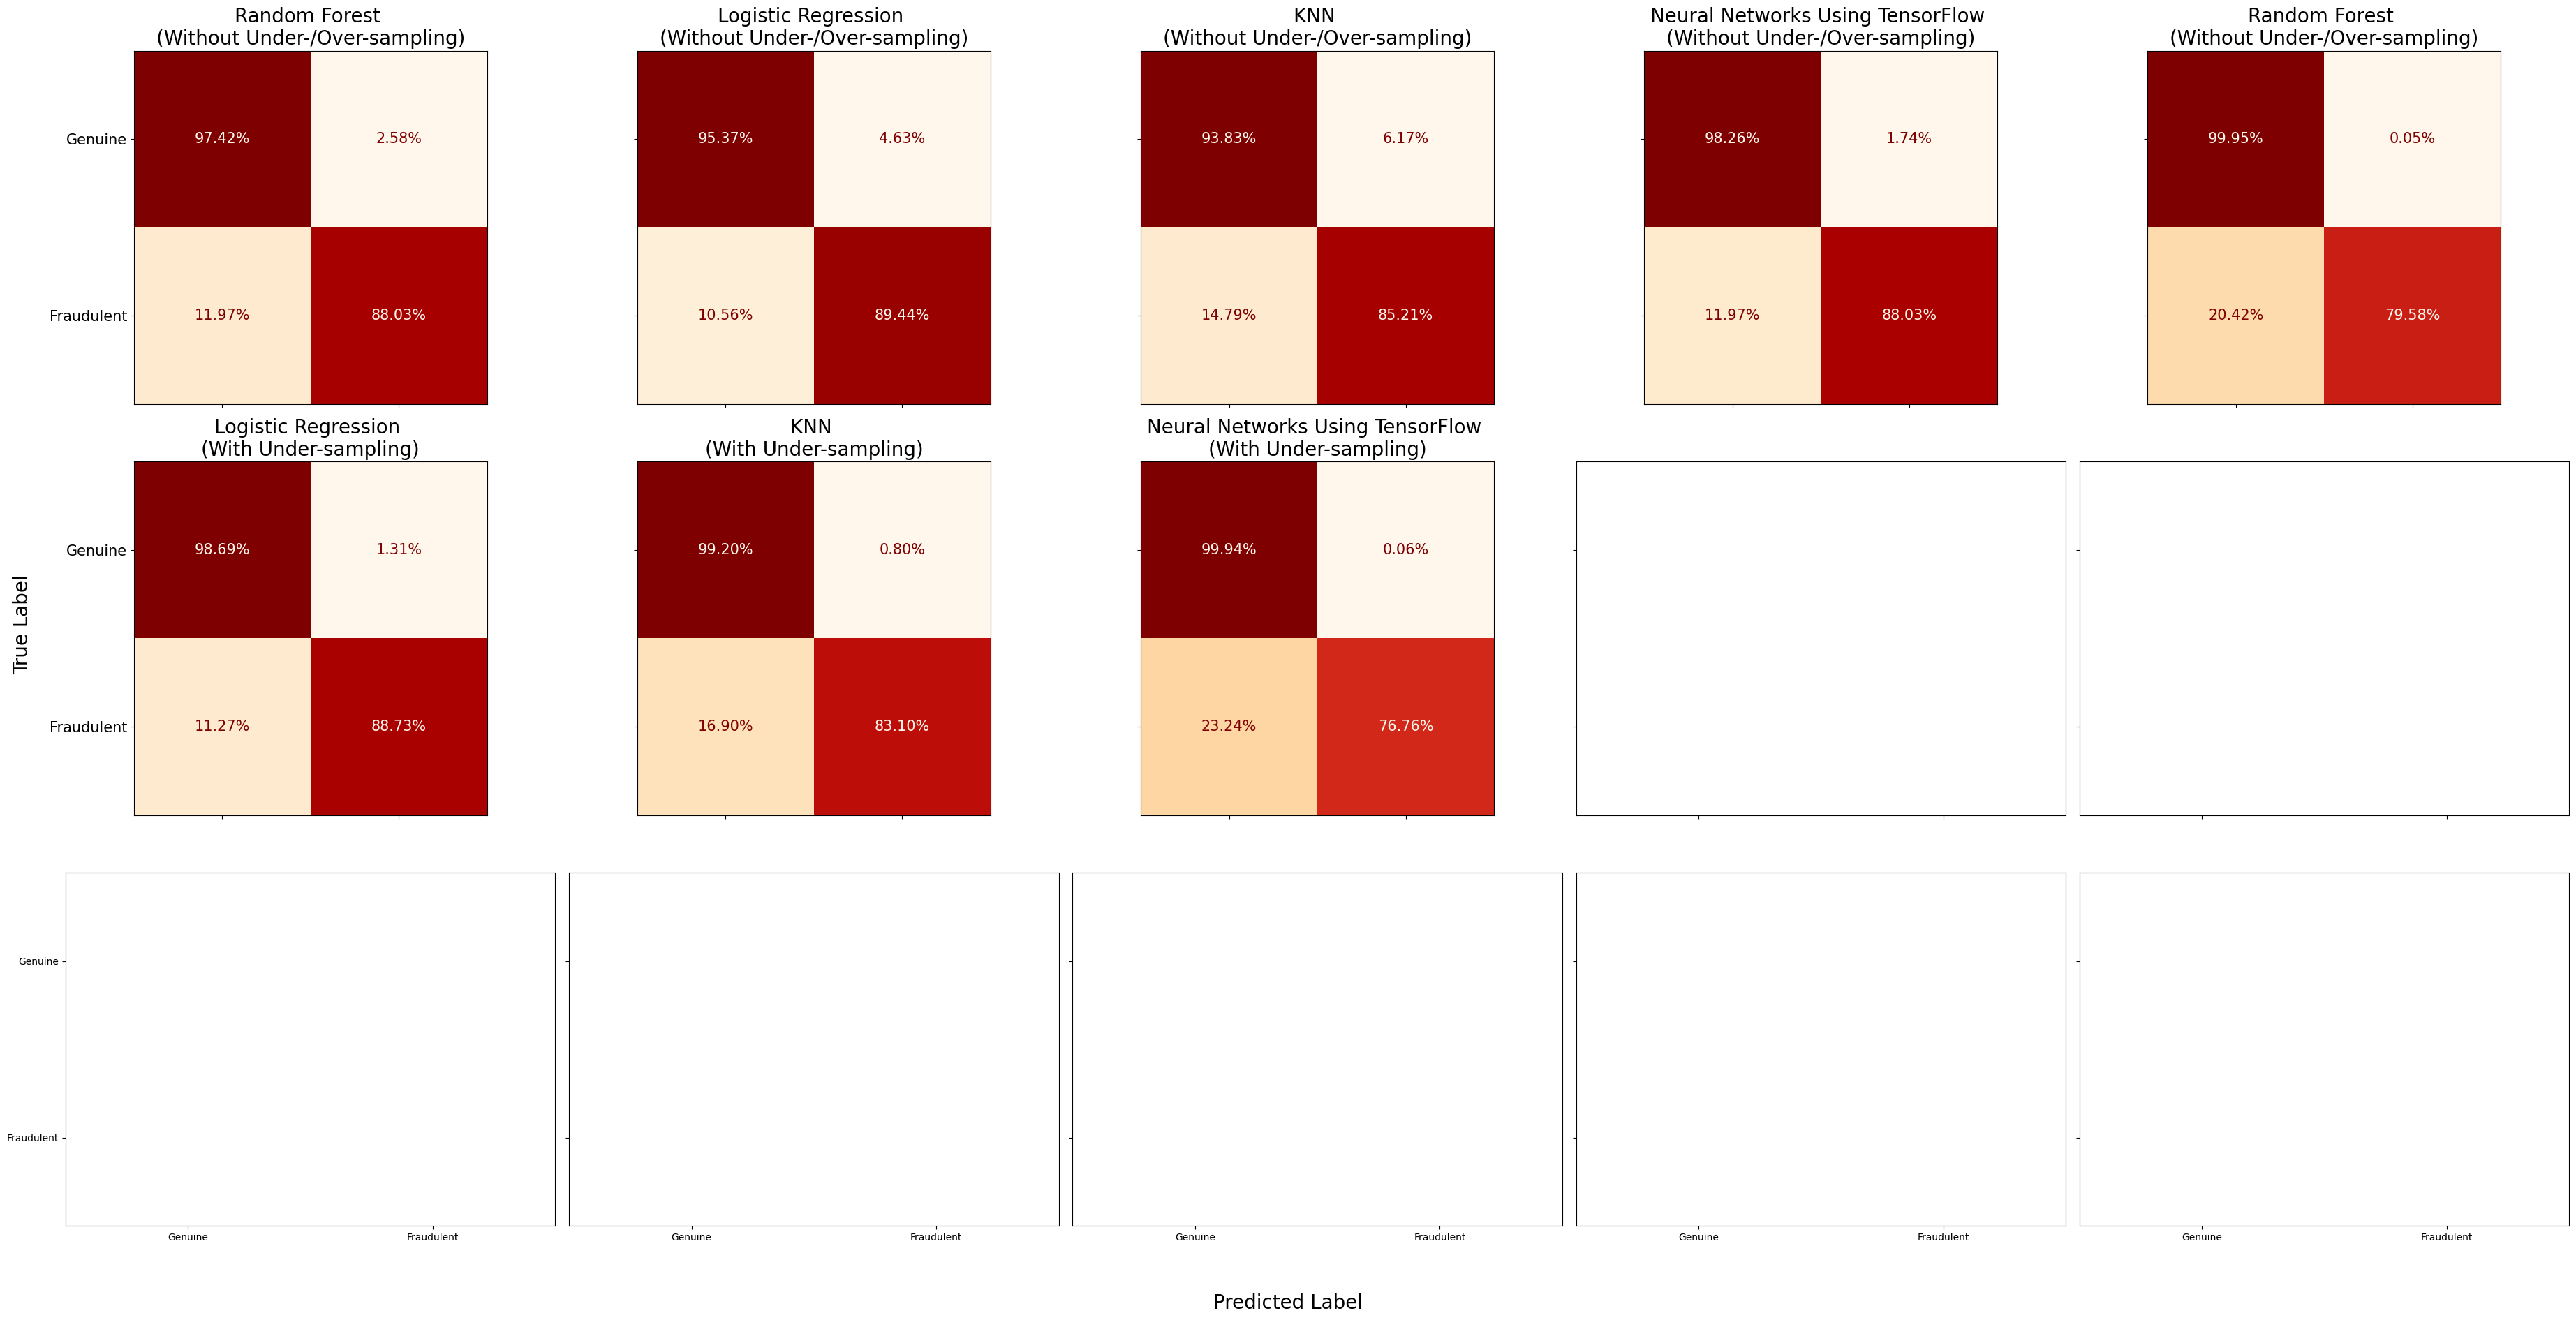

In [81]:
fig, axes = plt.subplots(3, 5, figsize=(37, 18), sharex=True, sharey=True)

predictions_summary_list = [ rf_under_pred, lr_under_pred, knn_under_pred, tf_under_pred, rf_smote_pred, lr_smote_pred, knn_smote_pred, tf_smote_pred]
models = ['Random Forest', 'Logistic Regression', 'KNN', 'Neural Networks Using TensorFlow'] * 3
techniques = ['Without Under-/Over-sampling'] * 5 + ['With Under-sampling'] * 5 + ['With SMOTE'] * 5

axes = axes.flatten()

for i, predictions in enumerate(predictions_summary_list):
    ax = axes[i]  
    cm_display = ConfusionMatrixDisplay.from_predictions(y_test, predictions, ax=ax, display_labels=display_labels, cmap='OrRd', colorbar=False, normalize='true', values_format='.2%', text_kw={"fontsize":15})
    
    title = f'{models[i]} \n({techniques[i]})'
    cm_display.ax_.set_title(f'{title}', fontsize=20)

    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

    axes[i].set_xticklabels(display_labels, fontsize=15)
    axes[i].set_yticklabels(display_labels, fontsize=15)
    
fig.text(0.5, -0.04, 'Predicted Label', ha='center', va='center', fontsize=20)
fig.text(0.01, 0.5, 'True Label', ha='center', va='center', rotation='vertical', fontsize=20)

plt.tight_layout() 
plt.show() 

In [82]:
# Compare the metrics
prediction_summary = pd.concat([ prediction_under, prediction_smote], ignore_index=False)

prediction_summary.head(15)

Recall  \
Technique                  Model                                        
With Random Under-sampling Random Forest                     0.880282   
                           Logistic Regression               0.894366   
                           KNN                               0.852113   
                           Neural Networks Using TensorFlow  0.880282   
With SMOTE                 Random Forest                     0.795775   
                           Logistic Regression               0.887324   
                           KNN                               0.830986   
                           Neural Networks Using TensorFlow  0.767606   

                                                             Precision  \
Technique                  Model                                         
With Random Under-sampling Random Forest                      0.053926   
                           Logistic Regression                0.031281   
                           KNN                                0.022566   
                           Neural Networks Using TensorFlow   0.078076   
With SMOTE                 Random Forest                      0.724359   
                           Logistic Regression                0.101368   
                           KNN                                0.148615   
                           Neural Networks Using TensorFlow   0.685535   

                                                             F1 Score  \
Technique                  Model                                        
With Random Under-sampling Random Forest                     0.101626   
                           Logistic Regression               0.060447   
                           KNN                               0.043968   
                           Neural Networks Using TensorFlow  0.143431   
With SMOTE                 Random Forest                     0.758389   
                           Logistic Regression               0.181949   
                           KNN                               0.252137   
                           Neural Networks Using TensorFlow  0.724252   

                                                             Accuracy  
Technique                  Model                                       
With Random Under-sampling Random Forest                     0.974036  
                           Logistic Regression               0.953617  
                           KNN                               0.938180  
                           Neural Networks Using TensorFlow  0.982460  
With SMOTE                 Random Forest                     0.999154  
                           Logistic Regression               0.986689  
                           KNN                               0.991776  
                           Neural Networks Using TensorFlow  0.999025